## Grand Challenge: RAVIR 
### Pipeline for binary classification. UNET with Dropout layers
#### Jonas Stylbäck & Miranda Gisudden

In [1]:
# External modules
%matplotlib inline
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Local modules
sys.path.append("/tf/ravir-challenge/") # Root path, change accordingly
from utils import *
from models import *

In [2]:
# Data parameters
train_dir = '/tf/ravir-challenge/dataset/train'
test_dir = '/tf/ravir-challenge/dataset/test'
img_w, img_h, img_c = 768, 768, 1
batch_size = 1
val_ratio = 0.3

# Model parameters
base = 8
dropout_rate = 0.2
optimizer = Adam
learning_rate = 1e-4
epochs = 150
metric = [dice_coef]
loss_func = dice_coef_loss

In [3]:
# Read data
image_list = get_file_list(train_dir, 'training_images')
mask_list = get_file_list(train_dir, 'training_masks')


Shape and Unique values of image :
 (768, 768, 1) 
 [0.         0.00784314 0.01176471 0.01960784 0.03137255 0.03529412
 0.03921569 0.04313726 0.04705882 0.05098039 0.05490196 0.05882353
 0.0627451  0.06666667 0.07058824 0.07450981 0.07843138 0.08235294
 0.08627451 0.09019608 0.09411765 0.09803922 0.10196079 0.10588235
 0.10980392 0.11372549 0.11764706 0.12156863 0.1254902  0.12941177
 0.13333334 0.13725491 0.14117648 0.14509805 0.14901961 0.15294118
 0.15686275 0.16078432 0.16470589 0.16862746 0.17254902 0.1764706
 0.18039216 0.18431373 0.1882353  0.19215687 0.19607843 0.2
 0.20392157 0.20784314 0.21176471 0.21568628 0.21960784 0.22352941
 0.22745098 0.23137255 0.23529412 0.23921569 0.24313726 0.24705882
 0.2509804  0.25490198 0.25882354 0.2627451  0.26666668 0.27058825
 0.27450982 0.2784314  0.28235295 0.28627452 0.2901961  0.29411766
 0.29803923 0.3019608  0.30588236 0.30980393 0.3137255  0.31764707
 0.32156864 0.3254902  0.32941177 0.33333334 0.3372549  0.34117648
 0.34509805 0.349

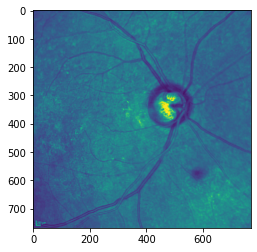


Shape and Unique values of mask :
 (768, 768, 1) 
 [0. 1.]


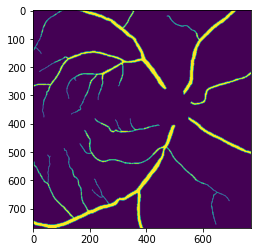

In [4]:
# Load train data
train_image_list, train_mask_list, val_image_list, val_mask_list \
= get_train_val_lists(image_list, mask_list, val_ratio)

x_train = load_as_binary(train_image_list, img_w, img_h, img_c, 'image')
y_train = load_as_binary(train_mask_list, img_w, img_h, img_c, 'mask')

x_val = load_as_binary(val_image_list, img_w, img_h, img_c, 'image')
y_val = load_as_binary(val_mask_list, img_w, img_h, img_c, 'mask')

# Debugging information
get_image_information(x_train, img_w, img_h, 'image', loaded = True)
get_image_information(y_train, img_w, img_h, 'mask', loaded = True)

In [5]:
# Load model
model = get_unet_BI_DO(base, img_w, img_h, img_c, dropout_rate)
model_compile = model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss_func, metrics = metric)

Model: "UNET_with_Dropout"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 768, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 768, 768, 8)  80          ['input_layer[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 768, 768, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 384, 384, 8)  0           ['conv2d_1[0][0]'

 spose)                                                                                           
                                                                                                  
 concatenate_3 (Concatenate)    (None, 768, 768, 16  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 768, 768, 16  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 768, 768, 8)  1160        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_14

In [6]:
# Train model
steps_per_epoch = x_train.shape[0]//batch_size

model_history = model.fit(
            x_train, y_train, batch_size = batch_size,
            epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/150
17/17 [==============================] - 4s 58ms/step - loss: -0.1223 - dice_coef: 0.1223 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 2/150
17/17 [==============================] - 1s 32ms/step - loss: -0.1227 - dice_coef: 0.1227 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 3/150
17/17 [==============================] - 1s 32ms/step - loss: -0.1231 - dice_coef: 0.1231 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 4/150
17/17 [==============================] - 1s 31ms/step - loss: -0.1237 - dice_coef: 0.1237 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 5/150
17/17 [==============================] - 1s 32ms/step - loss: -0.1245 - dice_coef: 0.1245 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 6/150
17/17 [==============================] - 1s 32ms/step - loss: -0.1262 - dice_coef: 0.1262 - val_loss: -0.0023 - val_dice_coef: 0.0023
Epoch 7/150
17/17 [==============================] - 1s 32ms/step - loss: -0.1302 - dice_coef: 0.1302 - val_loss: -0.0024 - 

17/17 [==============================] - 1s 32ms/step - loss: -0.5149 - dice_coef: 0.5149 - val_loss: -0.0029 - val_dice_coef: 0.0029
Epoch 57/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5185 - dice_coef: 0.5185 - val_loss: -0.0015 - val_dice_coef: 0.0015
Epoch 58/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5234 - dice_coef: 0.5234 - val_loss: -0.0025 - val_dice_coef: 0.0025
Epoch 59/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5216 - dice_coef: 0.5216 - val_loss: -0.0032 - val_dice_coef: 0.0032
Epoch 60/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5240 - dice_coef: 0.5240 - val_loss: -0.0031 - val_dice_coef: 0.0031
Epoch 61/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5237 - dice_coef: 0.5237 - val_loss: -0.0026 - val_dice_coef: 0.0026
Epoch 62/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5170 - dice_coef: 0.5170 - val_loss: -0.0032 - val_di

17/17 [==============================] - 1s 33ms/step - loss: -0.5713 - dice_coef: 0.5713 - val_loss: -3.1408e-04 - val_dice_coef: 3.1408e-04
Epoch 112/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5794 - dice_coef: 0.5794 - val_loss: -0.0012 - val_dice_coef: 0.0012
Epoch 113/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5791 - dice_coef: 0.5791 - val_loss: -0.0033 - val_dice_coef: 0.0033
Epoch 114/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5865 - dice_coef: 0.5865 - val_loss: -0.0018 - val_dice_coef: 0.0018
Epoch 115/150
17/17 [==============================] - 1s 32ms/step - loss: -0.5903 - dice_coef: 0.5903 - val_loss: -0.0013 - val_dice_coef: 0.0013
Epoch 116/150
17/17 [==============================] - 1s 33ms/step - loss: -0.5836 - dice_coef: 0.5836 - val_loss: -3.1536e-04 - val_dice_coef: 3.1536e-04
Epoch 117/150
17/17 [==============================] - 1s 33ms/step - loss: -0.5922 - dice_coef: 0.5922 - val_

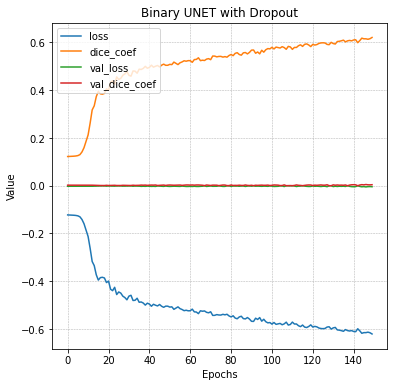

In [7]:
# Plot parameters
size_x = 6
size_y = 6
title = 'Binary UNET with Dropout'
x_label = 'Epochs'
y_label = 'Value'
legend = True
print_keys = False

# Line plot of model history
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history)

1/1 [==============================] - 2s 2s/step

Shape and Unique values of prediction :
 (768, 768, 1) 
 [0.0000000e+00 1.2030454e-38 1.2100320e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


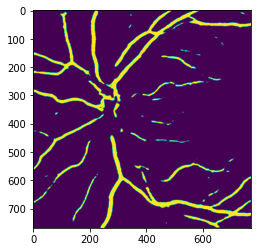

In [8]:
# Read and load test images for prediction
test_image_list = get_file_list(test_dir, '')
x_test = load_as_binary(test_image_list, img_w, img_h, img_c, 'image')

# Predict test images
predicted_mask_list = model.predict(x_test)

# Debugging information
get_image_information(predicted_mask_list, img_w, img_h, 'prediction', loaded = True)

1  out of  19  converted
2  out of  19  converted
3  out of  19  converted
4  out of  19  converted
5  out of  19  converted
6  out of  19  converted
7  out of  19  converted
8  out of  19  converted
9  out of  19  converted
10  out of  19  converted
11  out of  19  converted
12  out of  19  converted
13  out of  19  converted
14  out of  19  converted
15  out of  19  converted
16  out of  19  converted
17  out of  19  converted
18  out of  19  converted
19  out of  19  converted

Shape and Unique values of prediction mask :
 (768, 768) 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 

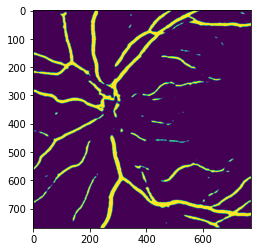

In [9]:
# Save predicted images to folder
save_binary_predictions(predicted_mask_list[0:len(predicted_mask_list)])

# Debugging information
prediction_list = get_file_list('/tf/ravir-challenge/predictions', '')
get_image_information(prediction_list, img_w, img_h, 'prediction mask', loaded = False)